## DSC550-Week-12-Munjewar ( Final Project Submission )

<lo>
    <li> Author: Sheetal Munjewar</br>
    <li> Date: 02/26/2024
<lo>

####  Load and Install python libraries

In [1]:
# Import libraries.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore FitFailedWarning for the entire notebook
warnings.filterwarnings("ignore", category=UserWarning, module=".*FitFailedWarning.*")
warnings.filterwarnings("ignore", category=ConvergenceWarning, module=".*Solver.*")

from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

#### Read-in train and test datasets

In [2]:
# Read-in train and test datasets
train = pd.read_csv('../week-06-final-project-part-1/carInsurance_train.csv')
test = pd.read_csv('../week-06-final-project-part-1/carInsurance_test.csv')

train.head()
test.head()


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


In [3]:
print('The train dataset has %d observations and %d features' % (train.shape[0], train.shape[1]))
print('The test dataset has %d observations and %d features' % (test.shape[0], test.shape[1]))

The train dataset has 4000 observations and 19 features
The test dataset has 1000 observations and 19 features


#### Data Exploration & Visualization¶

In [4]:
# Take a peak at the data
train.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [5]:
train.describe(include=['O'])

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


In [6]:
train.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


#### First check out correlations among numeric features, Heatmap is a useful tool to get a quick understanding of which variables are important

C:\Users\munje\AppData\Local\Temp\ipykernel_42808\824243832.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = train.corr()


<Figure size 1200x1200 with 0 Axes>

<Axes: >

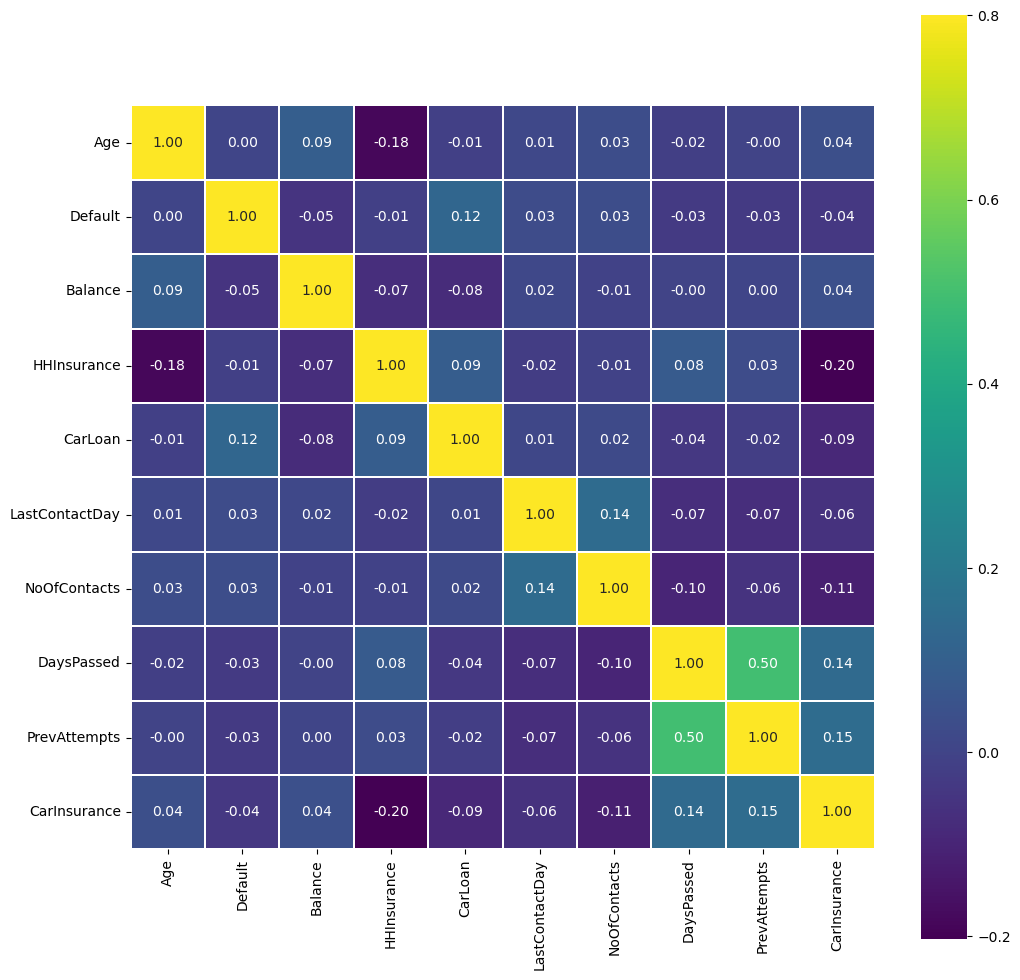

In [7]:
# First check out correlations among numeric features
# Heatmap is a useful tool to get a quick understanding of which variables are important
colormap = plt.cm.viridis
cor = train.corr()
cor = cor.drop(['Id'],axis=1).drop(['Id'],axis=0)
plt.figure(figsize=(12,12))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

* The features exhibit a generally independent relationship, with the exception of DaysPassed and PreAttempts. The success of cold calls shows a positive correlation with PreAttempts, DaysPassed, Age, and Balance, while displaying a negative correlation with default, HHInsurance, CarLoan, LastContactDay, and NoOfContacts.

C:\Users\munje\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


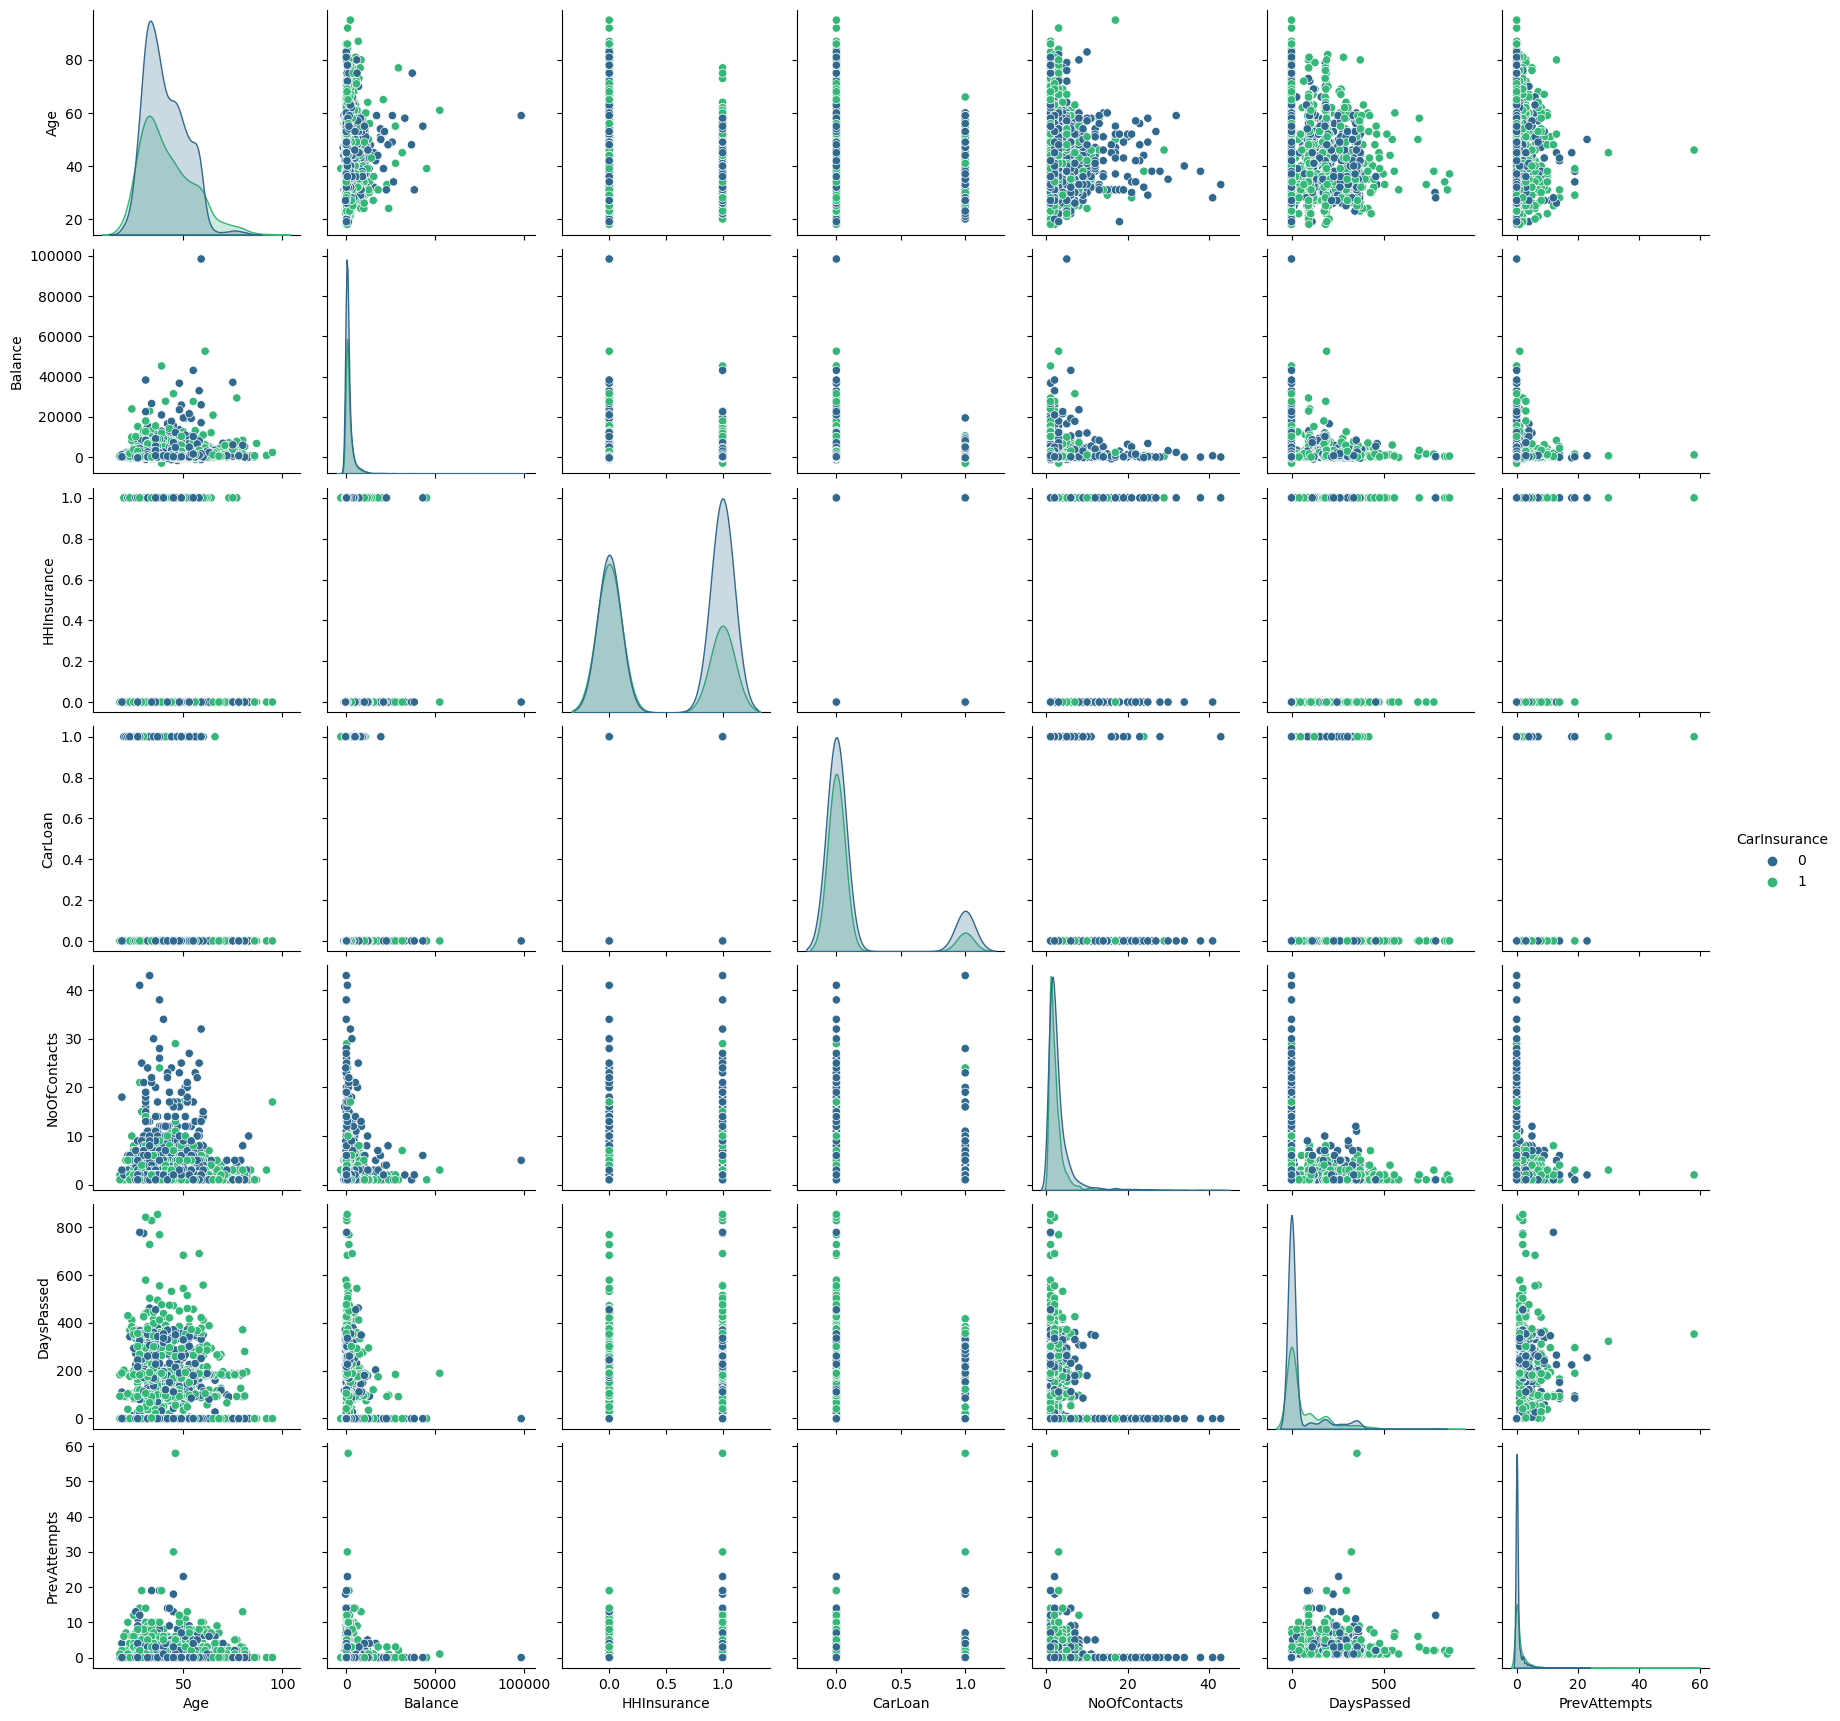

In [8]:
# Next, pair plot some important features
imp_feats = ['CarInsurance','Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts']
sns.pairplot(train[imp_feats],hue='CarInsurance',palette='viridis',size=2.5)
plt.show()

* Age: It's interesting to see that seniors are more likely to buy car insurance.
* Balance: For balance, the data point at the upper right corner might be an outlier
* HHInsurance: Households insured are less likely to buy car insurance
* CarLoan: People with car loan are less likely to buy
* NoOfContacts: Too many contacts causes customer attrition
* DaysPassed: It looks like the more day passed since the last contact, the better
* PrevAttempts: Also, more previous attempts, less likely to buy. There is a potential outlier here

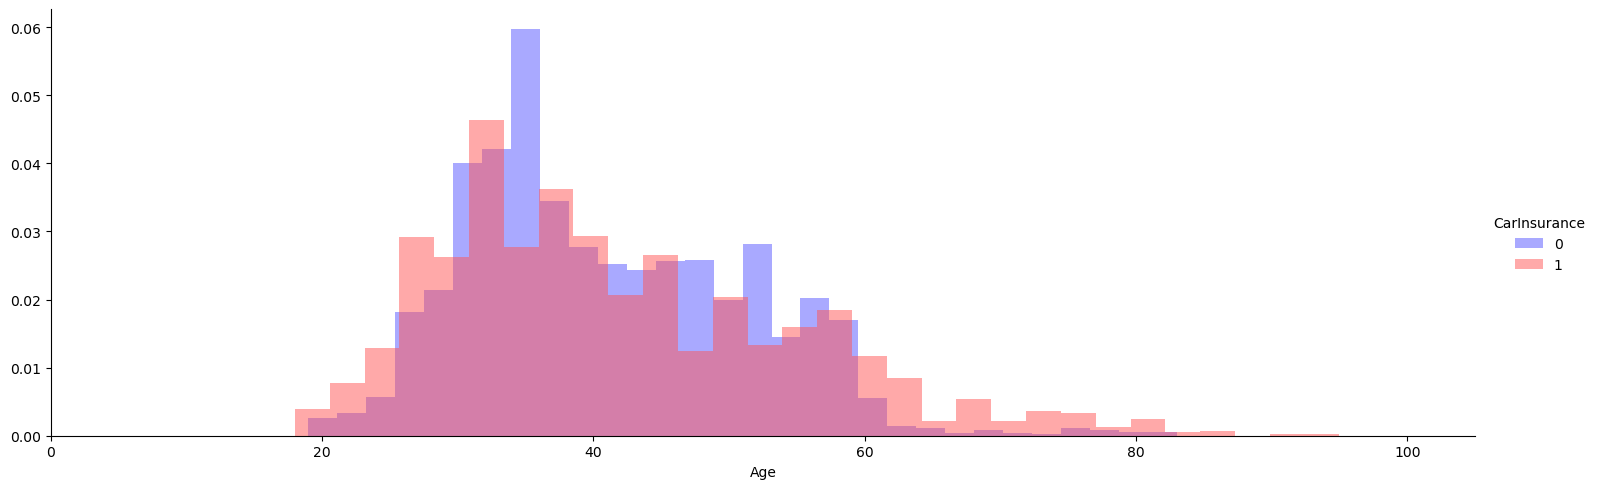

In [9]:
# Take a further look at Age
facet = sns.FacetGrid(train, hue='CarInsurance',height=5,aspect=3,palette='seismic')
facet.map(plt.hist,'Age',bins=30,alpha=0.5,density=True)
facet.set(xlim=(0,train.Age.max()+10))
facet.add_legend()

It appears that individuals in the age groups of 30 years or younger and seniors are more inclined to purchase car insurance from this bank.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Job', ylabel='CarInsurance'>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Marital', ylabel='CarInsurance'>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Education', ylabel='CarInsurance'>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Communication', ylabel='CarInsurance'>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='LastContactMonth', ylabel='CarInsurance'>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Outcome', ylabel='CarInsurance'>

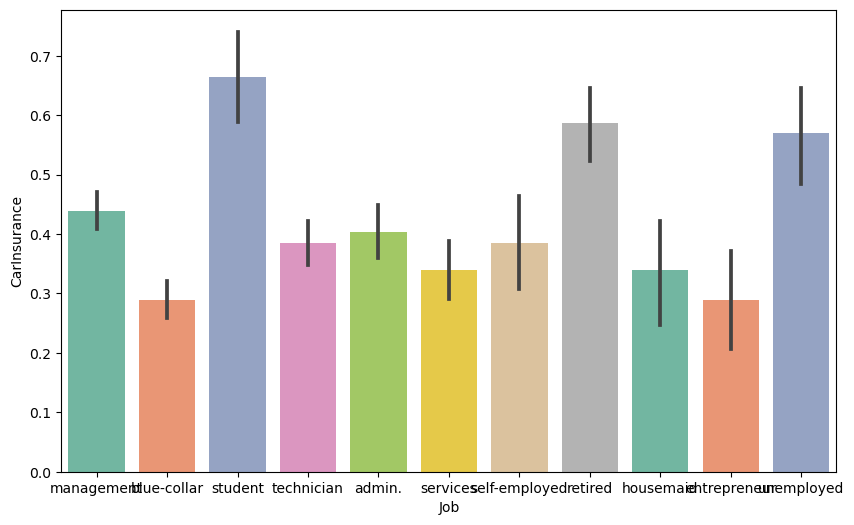

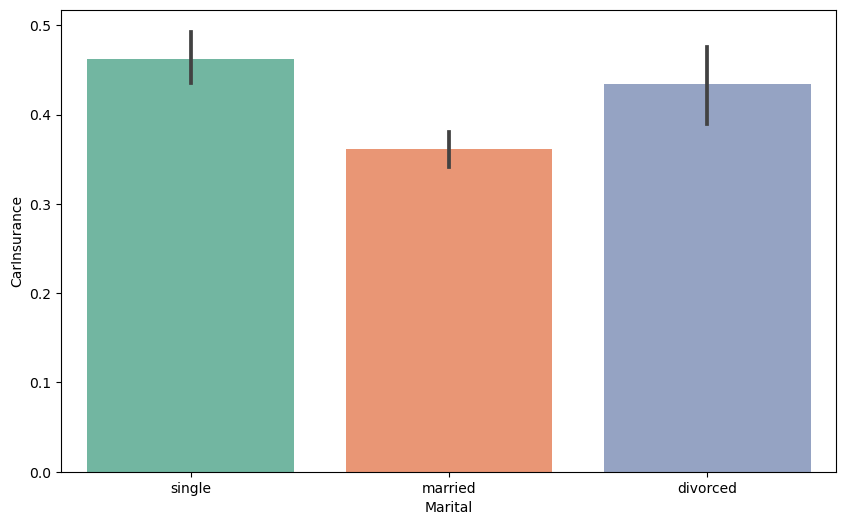

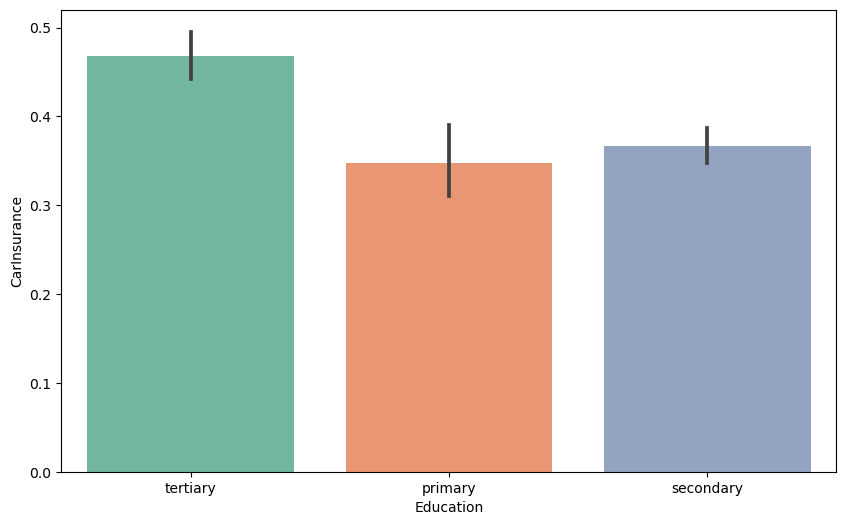

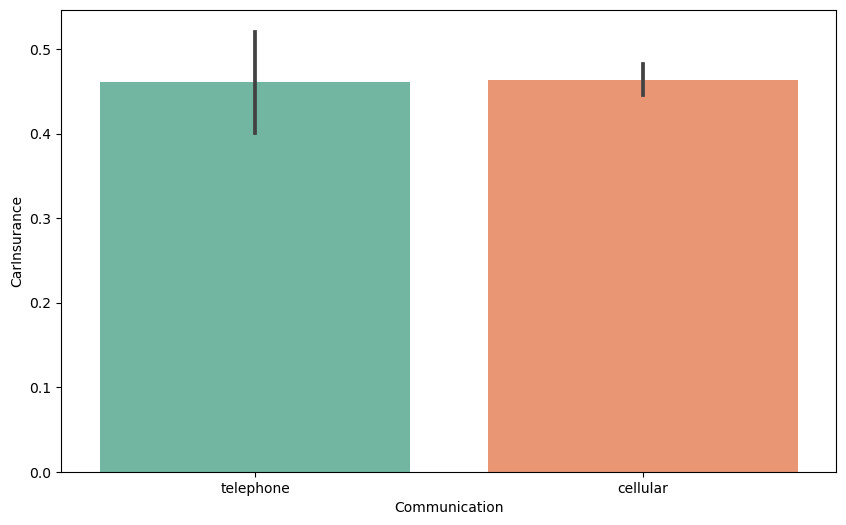

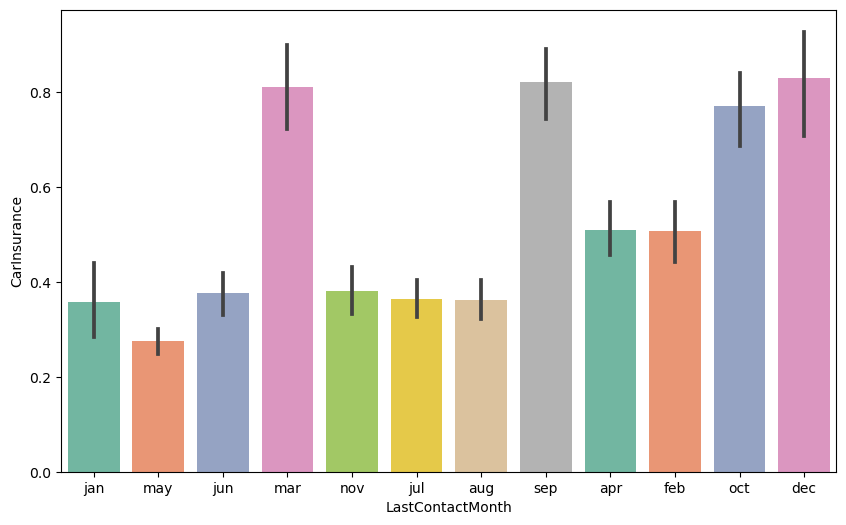

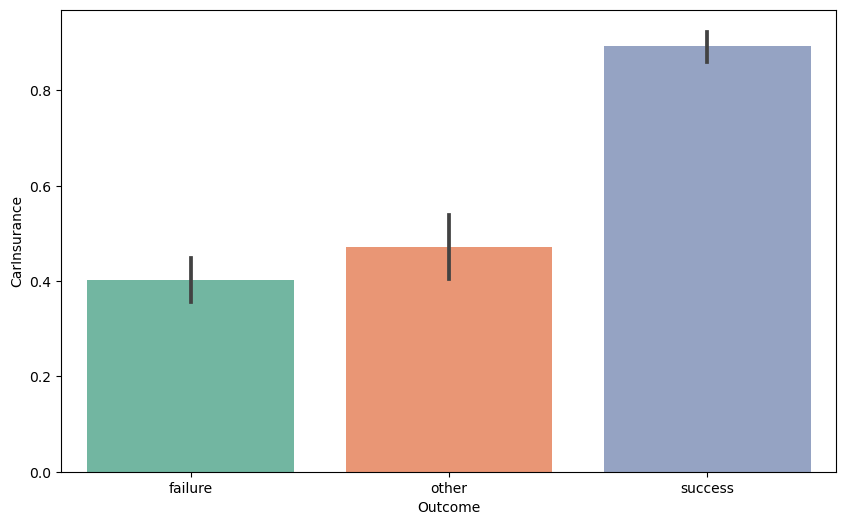

In [10]:
# Next check out categorical features
cat_feats = train.select_dtypes(include=['object']).columns
plt_feats = cat_feats[(cat_feats!= 'CallStart') & (cat_feats!='CallEnd')]

for feature in plt_feats:
    plt.figure(figsize=(10,6))
    sns.barplot(x=feature,y='CarInsurance', data=train ,palette='Set2') 

* Job: Student are most likely to buy insurance, followed by retired and unemployed folks.This is aligned with the age distribution. There might be some promotion targeting students?
* Marital status: Married people are least likely to buy car insurance. Opportunities for developing family insurance business
* Education: People with higher education are more likely to buy
* Communication: No big difference between cellular and telephone
* Outcome in previous campaign: Success in previous marketing campaign is largely associated with success in this campaign
* Contact Month: Mar, Sep, Oct, and Dec are the hot months. It might be associated with school season?

In [11]:
# Check outliers
# From the pairplot, we can see there is an outlier with extreme high balance. Drop that obs here.
train[train['Balance']>80000]
train = train.drop(train[train.index==1742].index)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


## Project Mile Stone - II

#### Handling Miss Data

In [12]:
# Combine the training and test datasets here to handle missing values collectively during the imputation process.
all=pd.concat([train,test],keys=('train','test'))
all.drop(['CarInsurance','Id'],axis=1,inplace=True)
print(all.shape)

(4999, 17)


#### Check for NULLs

In [13]:
total = all.isnull().sum()
pct = total/all.isnull().count()
NAs = pd.concat([total,pct],axis=1,keys=('Total','Pct'))
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

,Total,Pct
Outcome,3798,0.759752
Communication,1123,0.224645
Education,216,0.043209
Job,24,0.004801


In [14]:
all_df = all.copy()

# Complete the missing outcomes as 'not in the previous campaign.
all_df[all_df['DaysPassed']==-1].count()
all_df.loc[all_df['DaysPassed']==-1,'Outcome']='NoPrev'

# Replace missing communication entries with None.
all_df['Communication'].value_counts()
all_df['Communication'].fillna('None',inplace=True)

# Impute missing education values with the most prevalent education level based on job type
all_df['Education'].value_counts()

# Establish a mapping of the most common education level for each job type.
edu_mode=[]
job_types = all_df.Job.value_counts().index
for job in job_types:
    mode = all_df[all_df.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)
edu_map=pd.Series(edu_mode,index=all_df.Job.value_counts().index)

# Utilize the mapping to impute missing education observations.
for j in job_types:
    all_df.loc[(all_df['Education'].isnull()) & (all_df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]
all_df['Education'].fillna('None',inplace=True)

# Replace missing ejob entries with none
all_df['Job'].fillna('None',inplace=True)

# Verify to ensure there are no remaining missing values.
all_df.isnull().sum().sum()

Age                 3798
Job                 3779
Marital             3798
Education           3644
Default             3798
Balance             3798
HHInsurance         3798
CarLoan             3798
Communication       2682
LastContactDay      3798
LastContactMonth    3798
NoOfContacts        3798
DaysPassed          3798
PrevAttempts        3798
Outcome                0
CallStart           3798
CallEnd             3798
dtype: int64

cellular     3529
telephone     347
Name: Communication, dtype: int64

secondary    2489
tertiary     1600
primary       694
Name: Education, dtype: int64

0

### Feature Engineering

Three categories of attributes/features:

   * Client attributes: Age, Job, Marital, Education, Default, Balance, HHInsurance, CarLoan
   * Communication attributes: LastContactDay, LastContactMonth, CallStart, CallEnd, Communication, NoOfContacts, DaysPassed
   * Previous campaign attributes: PrevAttempts, Outcome

In [15]:
# Begin by simplifying certain client features.

# Establish age groups using predefined age bands.
all_df['AgeBand']=pd.cut(all_df['Age'],5)
print(all_df['AgeBand'].value_counts())

all_df.loc[(all_df['Age']>=17) & (all_df['Age']<34),'AgeBin'] = 1
all_df.loc[(all_df['Age']>=34) & (all_df['Age']<49),'AgeBin'] = 2
all_df.loc[(all_df['Age']>=49) & (all_df['Age']<65),'AgeBin'] = 3
all_df.loc[(all_df['Age']>=65) & (all_df['Age']<80),'AgeBin'] = 4
all_df.loc[(all_df['Age']>=80) & (all_df['Age']<96),'AgeBin'] = 5
all_df['AgeBin'] = all_df['AgeBin'].astype(int)

# Establish groups based on balances
all_df['BalanceBand']=pd.cut(all_df['Balance'],5)
print(all_df['BalanceBand'].value_counts())
all_df.loc[(all_df['Balance']>=-3200) & (all_df['Balance']<17237),'BalanceBin'] = 1
all_df.loc[(all_df['Balance']>=17237) & (all_df['Balance']<37532),'BalanceBin'] = 2
all_df.loc[(all_df['Balance']>=37532) & (all_df['Balance']<57827),'BalanceBin'] = 3
all_df.loc[(all_df['Balance']>=57827) & (all_df['Balance']<78122),'BalanceBin'] = 4
all_df.loc[(all_df['Balance']>=78122) & (all_df['Balance']<98418),'BalanceBin'] = 5
all_df['BalanceBin'] = all_df['BalanceBin'].astype(int)

all_df = all_df.drop(['AgeBand','BalanceBand','Age','Balance'],axis=1)

# Transform education levels into numeric values
all_df['Education'] = all_df['Education'].replace({'None':0,'primary':1,'secondary':2,'tertiary':3})


(33.4, 48.8]      2184
(17.923, 33.4]    1508
(48.8, 64.2]      1147
(64.2, 79.6]       133
(79.6, 95.0]        27
Name: AgeBand, dtype: int64
(-3113.645, 8071.0]    4847
(8071.0, 19200.0]       123
(19200.0, 30329.0]       20
(30329.0, 41458.0]        5
(41458.0, 52587.0]        4
Name: BalanceBand, dtype: int64


In [16]:
# Subsequently, generate additional communication features, introducing the role of feature engineering.

# Retrieve the duration of the phone calls.
all_df['CallEnd'] = pd.to_datetime(all_df['CallEnd'])
all_df['CallStart'] = pd.to_datetime(all_df['CallStart'])
all_df['CallLength'] = ((all_df['CallEnd'] - all_df['CallStart'])/np.timedelta64(1,'m')).astype(float)
all_df['CallLenBand']=pd.cut(all_df['CallLength'],5)
print(all_df['CallLenBand'].value_counts())

# Establish bins for call duration
all_df.loc[(all_df['CallLength']>= 0) & (all_df['CallLength']<11),'CallLengthBin'] = 1
all_df.loc[(all_df['CallLength']>=11) & (all_df['CallLength']<22),'CallLengthBin'] = 2
all_df.loc[(all_df['CallLength']>=22) & (all_df['CallLength']<33),'CallLengthBin'] = 3
all_df.loc[(all_df['CallLength']>=33) & (all_df['CallLength']<44),'CallLengthBin'] = 4
all_df.loc[(all_df['CallLength']>=44) & (all_df['CallLength']<55),'CallLengthBin'] = 5
all_df['CallLengthBin'] = all_df['CallLengthBin'].astype(int)
all_df = all_df.drop('CallLenBand',axis=1)

# Retrieve the hour when the call started.
all_df['CallStartHour'] = all_df['CallStart'].dt.hour
print(all_df[['CallStart','CallEnd','CallLength','CallStartHour']].head())

# Determine the workday of the last contact, considering the call day and month, with the assumption that the year is 2016.
all_df['LastContactDate'] = all_df.apply(lambda x:datetime.datetime.strptime("%s %s %s" %(2016,x['LastContactMonth'],x['LastContactDay']),"%Y %b %d"),axis=1)
all_df['LastContactWkd'] = all_df['LastContactDate'].dt.weekday
all_df['LastContactWkd'].value_counts()
all_df['LastContactMon'] = all_df['LastContactDate'].dt.month
all_df = all_df.drop('LastContactMonth',axis=1)

# Retrieve the week of the last contact
all_df['LastContactWk'] = all_df['LastContactDate'].dt.week

# Obtain the number of weeks in a month. While there may be simpler approaches, I'll continue exploring alternatives.
MonWk = all_df.groupby(['LastContactWk','LastContactMon'])['Education'].count().reset_index()
MonWk = MonWk.drop('Education',axis=1)
MonWk['LastContactWkNum']=0
for m in range(1,13):
    k=0
    for i,row in MonWk.iterrows():
        if row['LastContactMon']== m:
            k=k+1
            row['LastContactWkNum']=k
            
def get_num_of_week(df):
    for i,row in MonWk.iterrows():
        if (df['LastContactWk']== row['LastContactWk']) & (df['LastContactMon']== row['LastContactMon']):
            return row['LastContactWkNum']

all_df['LastContactWkNum'] = all_df.apply(lambda x: get_num_of_week(x),axis=1)
print(all_df[['LastContactWkNum','LastContactWk','LastContactMon']].head(10))            

(0.0292, 10.91]     4274
(10.91, 21.737]      601
(21.737, 32.563]     104
(32.563, 43.39]       15
(43.39, 54.217]        5
Name: CallLenBand, dtype: int64
                  CallStart             CallEnd  CallLength  CallStartHour
train 0 2024-02-24 13:45:20 2024-02-24 13:46:30    1.166667             13
      1 2024-02-24 14:49:03 2024-02-24 14:52:08    3.083333             14
      2 2024-02-24 16:30:24 2024-02-24 16:36:04    5.666667             16
      3 2024-02-24 12:06:43 2024-02-24 12:20:22   13.650000             12
      4 2024-02-24 14:35:44 2024-02-24 14:38:56    3.200000             14


5    982
3    970
4    968
6    845
2    541
0    517
1    176
Name: LastContactWkd, dtype: int64

C:\Users\munje\AppData\Local\Temp\ipykernel_42808\4152202020.py:31: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  all_df['LastContactWk'] = all_df['LastContactDate'].dt.week


         LastContactWkNum  LastContactWk  LastContactMon
train 0                 4              4               1
      1                 4             21               5
      2                 1             22               6
      3                 2             19               5
      4                 1             22               6
      5                 3             20               5
      6                 3             11               3
      7                 2             19               5
      8                 3             46              11
      9                 2             19               5


### Compiling the Final Datasets

In [17]:
# Separate numeric and categorical features
cat_feats = all_df.select_dtypes(include=['object']).columns
num_feats = all_df.select_dtypes(include=['float64','int64']).columns
num_df = all_df[num_feats]
cat_df = all_df[cat_feats]
print('There are %d numeric features and %d categorical features\n' %(len(num_feats),len(cat_feats)))
print('Numeric features:\n',num_feats.values)
print('Categorical features:\n',cat_feats.values)

There are 14 numeric features and 4 categorical features

Numeric features:
 ['Education' 'Default' 'HHInsurance' 'CarLoan' 'LastContactDay'
 'NoOfContacts' 'DaysPassed' 'PrevAttempts' 'CallLength' 'CallStartHour'
 'LastContactWkd' 'LastContactMon' 'LastContactWk' 'LastContactWkNum']
Categorical features:
 ['Job' 'Marital' 'Communication' 'Outcome']


In [18]:
# One-hot encoding
cat_df = pd.get_dummies(cat_df)

In [19]:
# Combine all features
all_data = pd.concat([num_df,cat_df],axis=1)

In [20]:
# Divide into training and testing sets
idx=pd.IndexSlice
train_df=all_data.loc[idx[['train',],:]]
test_df=all_data.loc[idx[['test',],:]]
train_label=train['CarInsurance']
print(train_df.shape)
print(len(train_label))
print(test_df.shape)

(3999, 36)
3999
(1000, 36)


In [21]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Train test split
x_train, x_test, y_train, y_test = train_test_split(train_df,train_label,test_size = 0.3,random_state=3)

x_train.shape
x_test.shape


(2799, 36)

(1200, 36)

## Project Mile Stone - III

In Milestone 3, you will begin the process of selecting, building, and evaluating a model. You are required to train and evaluate at least one model in this milestone. Write step-by-step for performing each of these steps. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. It is important to think about what type of model and metric makes sense for your problem. Again, do what makes the most sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.



### Building functions :

*   Retrieve_Optimal_Model() - Function to use exhaustively searching a specified parameter grid to find the combination of                                    hyperparameters that yields the best performance for a given machine learning model.

*   Fit_Model() - Call the fit method on the GridSearchCV object with your training data. During the fit process, GridSearchCV                     will train and evaluate the model for all combinations of hyperparameters specified in the parameter grid                       using cross-validation. 

*   plot_confusion_matrix() - Confusion matrix to plot and show number of true positives (TP), true negatives (TN), false                                     positives (FP), and false negatives (FN). These metrics are essential for evaluating the                                         effectiveness of a classification model. The confusion matrix is often used to calculate various                                 performance metrics such as accuracy, precision, recall, and F1 score.

In [22]:
# Create a cross validation function 
def Retrieve_Optimal_Model(estimator, params_grid={}):
    
    model = GridSearchCV(estimator = estimator,param_grid = params_grid,cv=3, scoring="accuracy", n_jobs= -1)
    model.fit(x_train,y_train)
    print('\n--- Best Parameters -----------------------------')
    print(model.best_params_)
    print('\n--- Best Model -----------------------------')
    best_model = model.best_estimator_
    print(best_model)
    return best_model

In [23]:
# Create a model fitting function
def Fit_Model(model,feature_imp=True,cv=5):

    # model fit   
    clf = model.fit(x_train,y_train)
    
    # model prediction     
    y_pred = clf.predict(x_test)
    
    # model report     
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

    print('\n--- Train Set -----------------------------')
    print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_train,y_train,cv=cv)),np.std(cross_val_score(clf,x_train,y_train,cv=cv))))
    print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_train,y_train,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf,x_train,y_train,cv=cv,scoring='roc_auc'))))
    print('\n--- Validation Set -----------------------------')    
    print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_test,y_test,cv=cv)),np.std(cross_val_score(clf,x_test,y_test,cv=cv))))
    print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_test,y_test,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf,x_test,y_test,cv=cv,scoring='roc_auc'))))
    print('-----------------------------------------------') 
    
    # feature importance 
    if feature_imp:
        feat_imp = pd.Series(clf.feature_importances_,index=all_data.columns)
        feat_imp = feat_imp.nlargest(15).sort_values()
        plt.figure()
        feat_imp.plot(kind="barh",figsize=(6,8),title="Most Important Features")
        

In [24]:
# The confusion matrix plotting function is from the sklearn documentation below:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['Success','Failure']

#### K-Nearest Neighbors (KNN)

* The choice to use k-Nearest Neighbors (KNN) - 
    
    KNN is a non-parametric algorithm, meaning it makes no assumptions about the underlying data distribution.
    Attributes derived and the relationship between features and target variables are bit complex and cannot be adequately           represented by a simple linear or nonlinear function.
    
    

*  Derived Attributes - 

    * Client attributes: Age, Job, Marital, Education, Default, Balance, HHInsurance, CarLoan
    * Communication attributes: LastContactDay, LastContactMonth, CallStart, CallEnd, Communication, NoOfContacts, DaysPassed
    * Previous campaign attributes: PrevAttempts, Outcome


--- Best Parameters -----------------------------
{'n_neighbors': 6, 'p': 2, 'weights': 'distance'}

--- Best Model -----------------------------
KNeighborsClassifier(n_neighbors=6, weights='distance')

--- Train Set -----------------------------
Accuracy: 0.81888 +/- 0.0261
AUC: 0.88610 +/- 0.0178

--- Validation Set -----------------------------
Accuracy: 0.76333 +/- 0.0238
AUC: 0.83877 +/- 0.0118
-----------------------------------------------


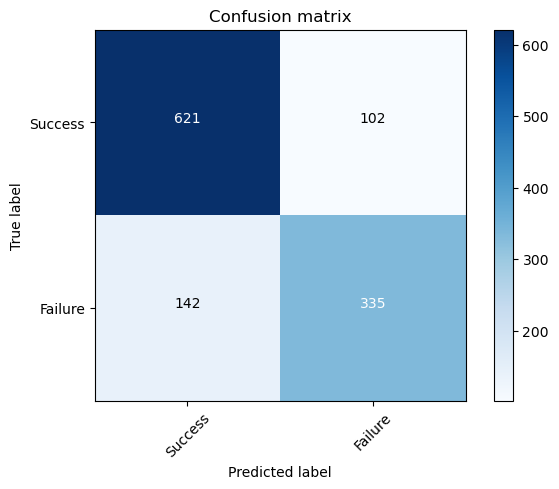

In [25]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

#  For each value in the list [5, 6, 7], the algorithm considers that specific number of nearest neighbors when making predictions.
#  A smaller value, such as 5, results in a more localized and potentially complex decision boundary, while a larger value, such as 7, leads to a smoother decision boundary. 
#  The weights parameter determines how the contributions of the neighbors are weighted when making predictions.

# Let's start with KNN. An accuracy of 0.76 is not very impressive. I will just take this as the model benchmark. 
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[5,6,7], 
              'p':[1,2],
              'weights':['uniform','distance']}
clf_knn = Retrieve_Optimal_Model(knn,parameters)
Fit_Model(model=clf_knn, feature_imp=False)

### Logistic Regression

*  Although the logistic regression model may not be the optimal selection, especially when dealing with non-linear relationships among the features, I still intend to apply it to the training dataset for accuracy prediction. This approach will enable a direct comparison with KNN and other models.

C:\Users\munje\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\munje\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\munje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\munje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueEr


--- Best Parameters -----------------------------
{'C': 0.9, 'penalty': 'l2'}

--- Best Model -----------------------------
LogisticRegression(C=0.9, random_state=3)

--- Train Set -----------------------------


C:\Users\munje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\munje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 0.81280 +/- 0.0192


C:\Users\munje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\munje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

AUC: 0.89198 +/- 0.0168

--- Validation Set -----------------------------


C:\Users\munje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\munje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 0.79667 +/- 0.0165
AUC: 0.88712 +/- 0.0102
-----------------------------------------------


C:\Users\munje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


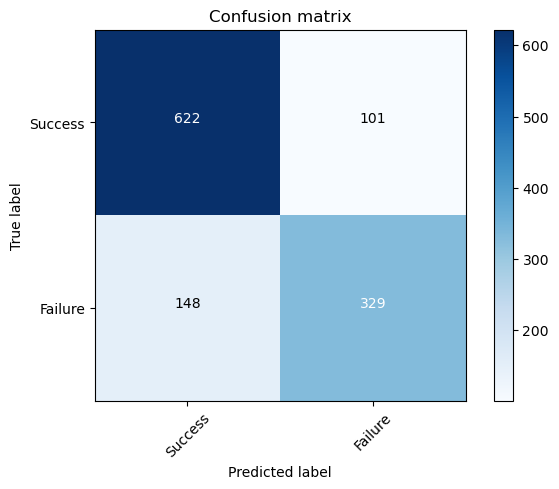

In [26]:
# We're making progress here. Logistic regression performs better than KNN. 

# The provided values [0.8, 0.9, 1] represent different levels of regularization strength to be explored.
# By providing ['l1', 'l2'], you are exploring both L1 and L2 regularization.
# L1 regularization (Lasso). It adds the absolute values of the coefficients to the cost function, 
# L2 regularization (Ridge). It adds the squared values of the coefficients to the cost function, penalizing large coefficients.

lg = LogisticRegression(random_state=3)
parameters = {'C':[0.8,0.9,1], 
              'penalty':['l1','l2']}
clf_lg = Retrieve_Optimal_Model(lg,parameters)
Fit_Model(model=clf_lg, feature_imp=False)

####  Conclusion -

In summary, our process of constructing and evaluating models ( KNN and Logistic Regression ) has offered valuable insights into their performance and predictive capabilities. Through meticulous analysis and comparison, we have discerned strengths and weaknesses, allowing us to make informed decisions about the most suitable model for our particular task. This comprehensive approach deepens our understanding of the data and establishes a foundation for effective decision-making in future applications. 

The KNeighborsClassifier algorithm is instantiated with n_neighbors:[5,6,7] (considering five nearest neighbors), p=2 (using Euclidean distance), and weights='uniform' and 'distance' (all neighbors contribute equally, and Closer neighbors have more influence on the prediction), achieved accuracies of 0.76, respectively.

The LogisticRegression algorithm with provided values [0.8, 0.9, 1] represent different levels of regularization strength to be explored, with penalty of ['l1', 'l2'], combining both values in a grid search, you are essentially exploring different combinations of regularization strength (C) and regularization type (penalty). This allows you to identify the combination that yields the best performance on your specific dataset.

KNN - Accuracy: 0.76333 +/- 0.0238
Logistic Regression - Accuracy: 0.79667 +/- 0.0165

Accuracy reported by Logistic Regression (0.79) is better compared to KNN algorithm with the value of 0.76. thanks 


## Final Project Mile Stone - Exploring more models.


### Naive Bayes Classifier


--- Train Set -----------------------------
Accuracy: 0.72026 +/- 0.0126
AUC: 0.78441 +/- 0.0122

--- Validation Set -----------------------------
Accuracy: 0.71083 +/- 0.0195
AUC: 0.77291 +/- 0.0287
-----------------------------------------------


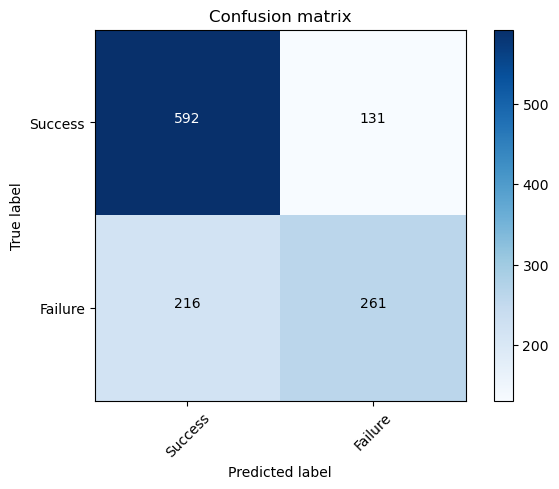

In [28]:
# As expected, Naive Bayes classifier doesn't perform well here. 
# There are multiple reasons. Some of the numeric features are not normally distributed, which is a strong assemption hold by Naive Bayes. 
# Also, features are definitely not independent.  

clf_nb = GaussianNB()
Fit_Model(model=clf_nb,feature_imp=False)


### Random Forest


--- Best Parameters -----------------------------
{'max_depth': 10, 'max_features': 13, 'min_samples_split': 11, 'n_estimators': 100}

--- Best Model -----------------------------
RandomForestClassifier(max_depth=10, max_features=13, min_samples_split=11,
                       random_state=3)

--- Train Set -----------------------------
Accuracy: 0.84888 +/- 0.0085
AUC: 0.92495 +/- 0.0084

--- Validation Set -----------------------------
Accuracy: 0.81750 +/- 0.0174
AUC: 0.90742 +/- 0.0082
-----------------------------------------------


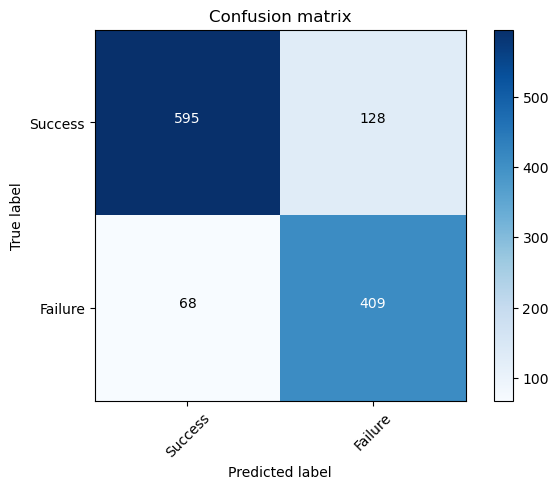

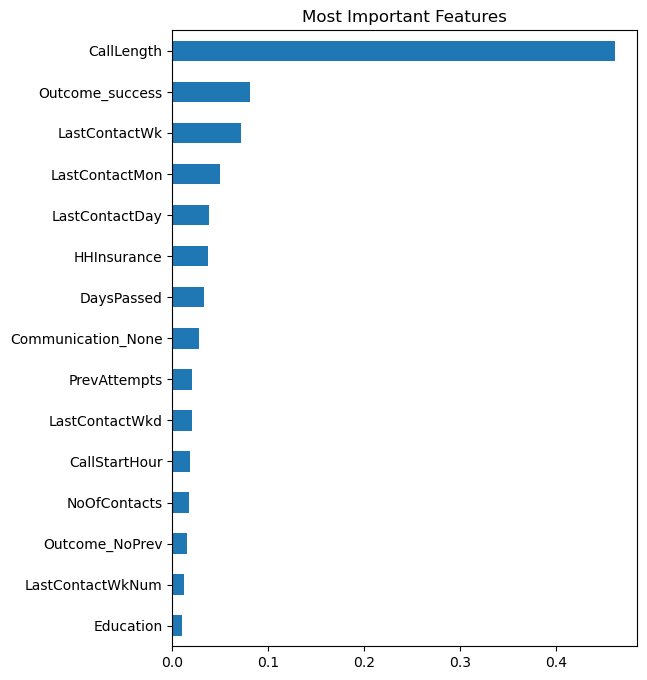

In [30]:
# I did some manual parameter tuning here. This is the best model so far. 
# Based on the feature importance report, call length, last contact week, and previous success are strong predictors of cold call success
rf = RandomForestClassifier(random_state=3)
parameters={'n_estimators':[100],
            'max_depth':[10],
            'max_features':[13,14],
            'min_samples_split':[11]}
clf_rf= Retrieve_Optimal_Model(rf,parameters)
Fit_Model(model=clf_rf, feature_imp=True)

### Model Evaluation

In [34]:
# Compare model performance
clfs= [clf_knn, clf_lg, clf_nb, clf_rf ]
index =['K-Nearest Neighbors','Logistic Regression','Naive Bayes','Random Forest']
scores=[]
for clf in clfs:
    score = np.mean(cross_val_score(clf,x_test,y_test,cv=5,scoring = 'accuracy'))
    scores = np.append(scores,score)
models = pd.Series(scores,index=index)
models.sort_values(ascending=False)

C:\Users\munje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\munje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Random Forest          0.817500
Logistic Regression    0.796667
K-Nearest Neighbors    0.763333
Naive Bayes            0.710833
dtype: float64